(499, 101) 
 (499, 101)
(499, 101)


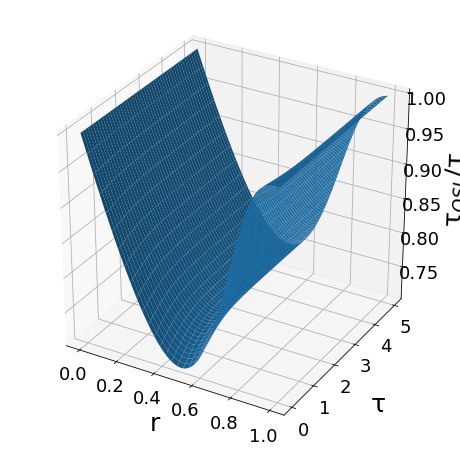

In [4]:
# eternal CP individible trying to make a surface plot of tau QSL/tau vs tau
# the rates are from Filipov's paper: 
# Filippov, Sergey N. et al. 
# “Phase Covariant Qubit Dynamics and Divisibility.” 
# Lobachevskii Journal of Mathematics (2020): n. pag.
import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy as np
from mpl_toolkits import mplot3d
import math
from matplotlib import cm

def g3(v,a1,t): #gamma3
    r3=-(v*(1-a1**2)*np.sinh(2*v*t))/(2*(1+a1**2+(1-a1**2)*np.cosh(2*v*t)))
    return r3

def evolve(a1,v,rho,t): #evolution of the density matrix
    coh=np.exp(-v*t)*np.sqrt(0.5*(1+a1**2+(1-a1**2)*np.cosh(2*v*t)))
    pt=np.exp(-2*v*t)*(0.5*(1-a1)*(np.exp(2*v*t)-1)+rho[1,1])
    rhot=np.zeros((2,2))
    rhot[0,0]=1-pt
    rhot[1,1]=pt
    rhot[0,1]=rho[0,1]*coh
    rhot[1,0]=rho[1,0]*coh
    return rhot

def lind(a1,v,t,rhot): #time local master equation
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((2,2))
    ld=v*(1+a1)*(sp@rhot@sm-0.5*(sm@sp@rhot+rhot@sm@sp))+v*(1-a1)*(sm@rhot@sp-0.5*(sp@sm@rhot+rhot@sp@sm))+g3(v,a1,t)*(sz@rhot@sz-rhot)
    return ld

def maxvalgen(a1,v,t,rho): #generates the required max value
    rhot=evolve(a1,v,rho,t)
    norm=lind(a1,v,t,rhot).T@lind(a1,v,t,rhot)
    val=np.linalg.eig(norm)[0]
    fx=np.sqrt(max(abs(val))) #converts into float from complex
    return fx

def integrator(a1,v,n,time,rho,dt):     
    fint=np.zeros(len(time)-1) #will hold the final integrated values
    summer=0
    j=0
    dtt=dt/n #smaller chunks
    while j<len(time)-1: 
        a=time[j] #lower limit
        b=time[j+1]
        f=lambda x1:maxvalgen(a1,v,x1,rho)
        summer=summer+quad(f,a,b)[0]
        fint[j]=summer
        j=j+1
    return fint


def bures(a1,v,time,rho): #the Bures angle 
    b=np.zeros(len(time)-1) #holds bures angle
    ct=0
    z1=0
    garb=np.zeros((2,2))
    for t1 in range(len(time)-1):
        t=time[t1+1]
        garb=evolve(a1,v,rho,t)@rho
        f=garb.trace()#+2*np.sqrt(np.linalg.det(rho)*np.linalg.det(evolve(a1,v,rho,t)))
        z1=math.acos(np.sqrt(f))
        b[ct]=np.sin(z1)**2
        ct=ct+1
    return b

z=0.5
v=1
n=20
dt=0.01
a=np.arange(0,1+0.01,0.01)
time=np.arange(0,5,dt)
ax1,timey=np.meshgrid(a,time[1:])
print(ax1.shape,'\n',timey.shape)
#qsl=np.zeros((timey.shape[0],ax1.shape[1]))
qsl=np.zeros((len(time)-1,len(a)))
print(qsl.shape)
i=0

for ai in a:
    rho=np.array([[ai,np.sqrt(ai*(1-ai))],[np.sqrt(ai*(1-ai)),1-ai]])
    fint=integrator(z,v,n,time,rho,dt)
    burs=bures(z,v,time,rho)
    qsl[:,i]=np.divide(burs,fint)  
    i=i+1

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(ax1,timey,qsl)
#ax.text2D(0.01, 0.81, "(a)", transform=ax.transAxes, fontsize=30)
ax.set_xlabel('r',fontsize=25,labelpad=10)
ax.set_ylabel('\n \u03C4',fontsize=25,labelpad=10)
ax.set_zlabel('\u03C4$_{QSL}$/\u03C4',fontsize=25,labelpad=15)
plt.show()


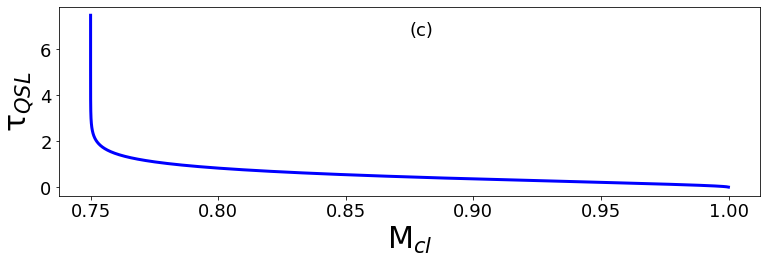

In [3]:
# generating the coherence-mixedness relation for the maximally coherent initial state
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import math
import scipy.integrate as scint
from matplotlib import cm
import matplotlib.gridspec as gridspec

def g3(v,a1,t):
    r3=-(v*(1-a1**2)*np.sinh(2*v*t))/(2*(1+a1**2+(1-a1**2)*np.cosh(2*v*t)))
    return r3

def evolve(a1,v,rho,t):
    coh=np.exp(-v*t)*np.sqrt(0.5*(1+a1**2+(1-a1**2)*np.cosh(2*v*t)))
    pt=np.exp(-2*v*t)*(0.5*(1-a1)*(np.exp(2*v*t)-1)+rho[1,1])
    rhot=np.zeros((2,2))
    rhot[0,0]=1-pt
    rhot[1,1]=pt
    rhot[0,1]=rho[0,1]*coh
    rhot[1,0]=rho[1,0]*coh
    return rhot

def lind(a1,v,t,rhot):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((2,2))
    ld=v*(1+a1)*(sp@rhot@sm-0.5*(sm@sp@rhot+rhot@sm@sp))+v*(1-a1)*(sm@rhot@sp-0.5*(sp@sm@rhot+rhot@sp@sm))+g3(v,a1,t)*(sz@rhot@sz-rhot)
    return ld

def maxvalgen(a1,v,t,rho): #generates the required max value
    rhot=evolve(a1,v,rho,t)
    norm=lind(a1,v,t,rhot).T@lind(a1,v,t,rhot)
    val=np.linalg.eig(norm)[0]
    rs=rho@rho
    rts=rhot@rhot
    fx=np.sqrt(max(abs(val)))*(1+np.sqrt((1-rs.trace())/(1-rts.trace()))) #converts into float from complex
    return fx

def integrator(a1,v,time,rho):     
    fint=np.zeros(len(time)-1) #will hold the final integrated values
    summer=0
    j=0
    while j<len(time)-1: 
        a=time[j] #lower limit
        b=time[j+1]
        f=lambda x1:maxvalgen(a1,v,x1,rho)
        summer=summer+scint.quad(f,a,b)[0]
        fint[j]=summer
        j=j+1
    return fint


def bures(a1,v,time,rho): #the Bures angle 
    b=np.zeros(len(time)-1) #holds bures angle
    ct=0
    z1=0
    garb=np.zeros((2,2))
    for t1 in range(len(time)-1):
        t=time[t1+1]
        rhot=evolve(a1,v,rho,t)
        garb=rhot@rho
        rs=rho@rho
        rts=rhot@rhot
        f=garb.trace()+np.sqrt((1-rs.trace())*(1-rts.trace()))
        z1=math.acos(np.sqrt(f))
        b[ct]=np.sin(z1)**2
        #print(b[ct])
        ct=ct+1
    return b

a1=0.5
v=1
dt=0.01

ai=0.01
#rho=np.array([[0.3,0.005],[0.005,0.7]])
#rho=np.array([[ai,np.sqrt(ai*(1-ai))],[np.sqrt(ai*(1-ai)),1-ai]])
#rho=np.array([[0.5,0.45],[0.45,0.5]]) #mixed state
rho=np.array([[0.5,0.5],[0.5,0.5]])
#rho=np.array([[0.25,0.25*np.sqrt(3)],[0.25*np.sqrt(3),0.75]])
#rho=np.array([[1,0],[0,0]])
time=np.arange(0,10,dt)
ingt=np.zeros(len(time)-1)
bur=np.zeros(len(time)-1)
qsl=np.zeros(len(time)-1)

ingt=integrator(a1,v,time,rho)
bur=bures(a1,v,time,rho)
qsl=np.divide(bur,ingt)
"""plt.plot(time[1:],qsl)
plt.ylim([0,1])
plt.xlabel('\u03C4')
plt.ylabel('\u03C4(QSL)/\u03C4')
plt.show()"""

rhot=np.zeros((2,2))
garb=np.zeros((2,2))
Cpar=np.zeros(len(time)-1)
mix=np.zeros(len(time)-1)
bound=np.zeros(len(time)-1)
for i in range(len(time)-1):
    rhot=evolve(a1,v,rho,time[i+1])
    Cpar[i]=abs(rhot[0,1])+abs(rhot[1,0])
    garb=rhot@rhot
    mix[i]=2*(1-garb.trace())
    #bound[i]=Cpar[i]**2+mix[i]
    bound[i]=4*rhot[0,0]*rhot[1,1]
    i=i+1
qslt=time[1:]*qsl

fig = plt.figure(tight_layout=True,figsize=(11,4))
plt.rcParams.update({'font.size': 18})
gs = gridspec.GridSpec(1, 2)
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(bound,qslt,'b',linewidth=3)
ax1.set_xlabel('M$_{cl}$',fontsize=30)
ax1.set_ylabel('\u03C4$_{QSL}$',fontsize=30)
ax1.text(0.5, 0.85, '(c)',transform=ax1.transAxes)
#plt.savefig('et_cpind.png',dpi=120,bbox_inches='tight',pad_inches = 0.1)